# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [225]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [226]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(city)

Number of cities in the list: 574
avarua


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [227]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # find url
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather = request.get(city_url).json()
        response = requests.get(city_url)
        status_code= response.status_code

        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {}
    
        #Extracttion
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind =city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        city_pressure = city_weather.get("main", {}).get("pressure")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Pressue": city_pressure,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
    #sleep for 1 sec
    time.sleep(1)

              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | egilsstadir
Processing Record 4 of Set 1 | margate
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | betio village
Processing Record 7 of Set 1 | oranjemund
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | victorica
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | sabha
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | guerrero negro
Processing Record 22 of Set 1 | bismarck

In [228]:
city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
city_url

'http://api.openweathermap.org/data/2.5/weather?appid=90752e0fee7fe60ece9d0c5a2335a6d2&units=imperial&q=cloverdale'

In [229]:
reponse

<Response [200]>

In [230]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          574
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Pressue       550
Date          550
dtype: int64

In [231]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Pressue,Date
0,blackmans bay,-43.0167,147.3167,50.74,94.0,100.0,6.89,AU,1014.0,1.717379e+09
1,waitangi,-43.9535,-176.5597,50.83,89.0,58.0,20.00,NZ,1005.0,1.717379e+09
2,egilsstadir,65.2653,-14.3948,42.71,49.0,75.0,9.22,IS,999.0,1.717379e+09
3,margate,51.3813,1.3862,53.69,86.0,73.0,3.00,GB,1023.0,1.717379e+09
4,carnarvon,-24.8667,113.6333,67.59,53.0,21.0,8.08,AU,1022.0,1.717379e+09


In [232]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [233]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Pressue,Date
City_ID,,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,50.74,94.0,100.0,6.89,AU,1014.0,1.717379e+09
1,waitangi,-43.9535,-176.5597,50.83,89.0,58.0,20.00,NZ,1005.0,1.717379e+09
2,egilsstadir,65.2653,-14.3948,42.71,49.0,75.0,9.22,IS,999.0,1.717379e+09
3,margate,51.3813,1.3862,53.69,86.0,73.0,3.00,GB,1023.0,1.717379e+09
4,carnarvon,-24.8667,113.6333,67.59,53.0,21.0,8.08,AU,1022.0,1.717379e+09


In [234]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 0 to 573
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        574 non-null    object 
 1   Lat         550 non-null    float64
 2   Lng         550 non-null    float64
 3   Max Temp    550 non-null    float64
 4   Humidity    550 non-null    float64
 5   Cloudiness  550 non-null    float64
 6   Wind Speed  550 non-null    float64
 7   Country     546 non-null    object 
 8   Pressue     550 non-null    float64
 9   Date        550 non-null    float64
dtypes: float64(8), object(2)
memory usage: 49.3+ KB


In [235]:
#df = city_data_df 
city_data_df.loc[pd.isnull(city_data_df.Lat)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Pressue,Date
City_ID,,,,,,,,,,
96,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,puerto san carlos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,postmasburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,kataragama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,bardaskan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,toga village,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,tranovaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,san antonio del estrecho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,ibra',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
df = city_data_df.dropna(how="any").reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     546 non-null    int64  
 1   City        546 non-null    object 
 2   Lat         546 non-null    float64
 3   Lng         546 non-null    float64
 4   Max Temp    546 non-null    float64
 5   Humidity    546 non-null    float64
 6   Cloudiness  546 non-null    float64
 7   Wind Speed  546 non-null    float64
 8   Country     546 non-null    object 
 9   Pressue     546 non-null    float64
 10  Date        546 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 47.0+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

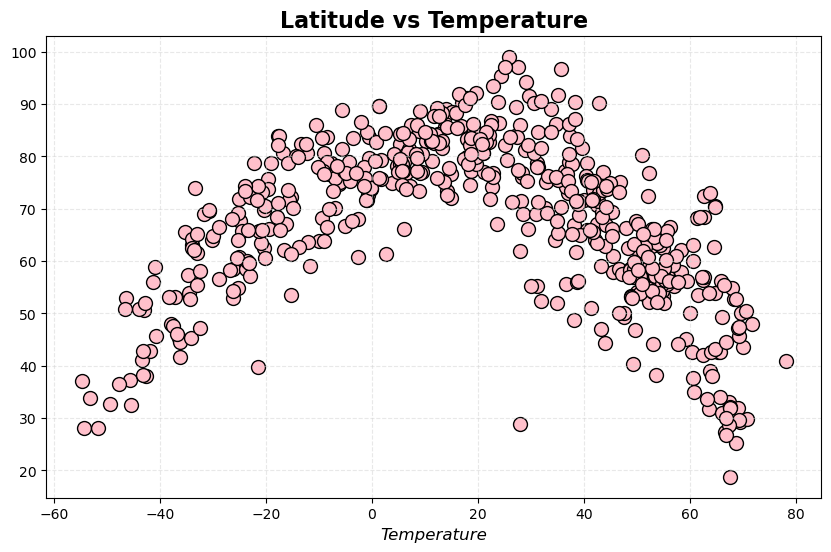

In [237]:
# Build scatter plot for latitude vs. temperature
x=df.Lat
y=df["Max Temp"]

plt.figure(figsize=(10,6))


# Incorporate the other graph properties
plt.scatter(x, y, facecolor="pink", edgecolor="black", s=100)

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.xlabel("Temperature", fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

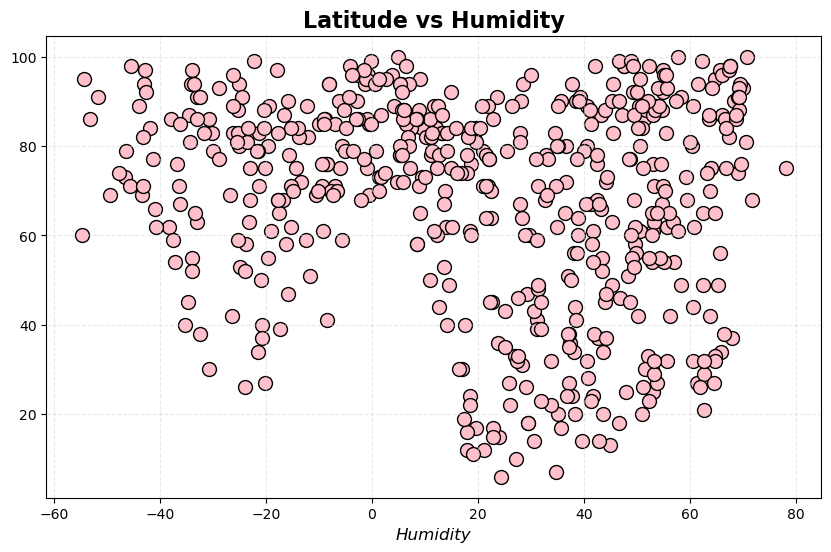

In [262]:
# Build the scatter plots for latitude vs. humidity
x=df.Lat
y=df.Humidity

plt.figure(figsize=(10,6))


# Incorporate the other graph properties
plt.scatter(x, y, facecolor="pink", edgecolor="black", s=100)

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.xlabel("Humidity", fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

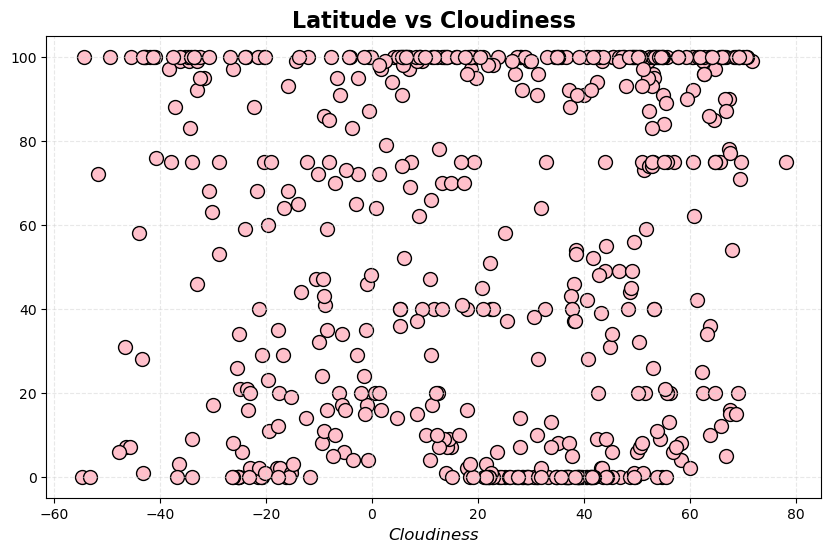

In [263]:
# Build the scatter plots for latitude vs. cloudiness

x=df.Lat
y=df.Cloudiness

plt.figure(figsize=(10,6))


# Incorporate the other graph properties
plt.scatter(x, y, facecolor="pink", edgecolor="black", s=100)

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.xlabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

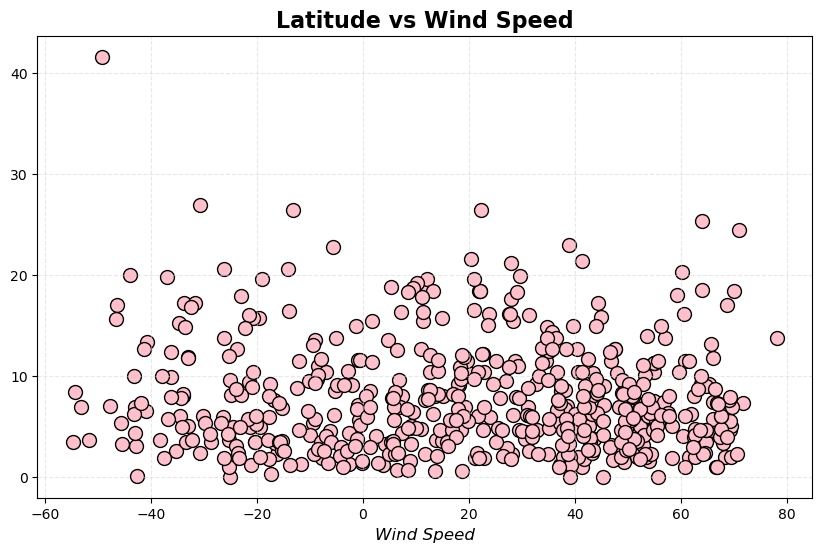

In [264]:
# Build the scatter plots for latitude vs. wind speed
x=df.Lat
y=df["Wind Speed"]

plt.figure(figsize=(10,6))


# Incorporate the other graph properties
plt.scatter(x, y, facecolor="pink", edgecolor="black", s=100)

plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.xlabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [241]:
# Define a function to create Linear Regression plots
def linearRegressionfunc(x,y, x_title, y_title, anott):
    # Add the linear regression equation and line to plot
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.figure(figsize=(10,6))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, anott, fontsize=15, color="red")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(f"{x_title} vs {y_title}")

    print(f"The r_squared is: {rvalue**2}")
    plt.show()

In [242]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=df.loc[df.Lat >=0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Pressue,Date
2,2,egilsstadir,65.2653,-14.3948,42.71,49.0,75.0,9.22,IS,999.0,1.717379e+09
3,3,margate,51.3813,1.3862,53.69,86.0,73.0,3.00,GB,1023.0,1.717379e+09
5,5,betio village,1.3580,172.9211,89.64,73.0,72.0,8.55,KI,1009.0,1.717379e+09
8,9,bethel,41.3712,-73.4140,71.76,67.0,0.0,1.01,US,1013.0,1.717379e+09
11,12,georgetown,5.4112,100.3354,82.35,78.0,40.0,3.44,MY,1012.0,1.717379e+09


In [243]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=df.loc[df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Pressue,Date
0,0,blackmans bay,-43.0167,147.3167,50.74,94.0,100.0,6.89,AU,1014.0,1.717379e+09
1,1,waitangi,-43.9535,-176.5597,50.83,89.0,58.0,20.00,NZ,1005.0,1.717379e+09
4,4,carnarvon,-24.8667,113.6333,67.59,53.0,21.0,8.08,AU,1022.0,1.717379e+09
6,7,grytviken,-54.2811,-36.5092,28.11,95.0,100.0,8.43,GS,996.0,1.717379e+09
7,8,west island,-12.1568,96.8225,80.58,89.0,75.0,11.50,CC,1013.0,1.717379e+09


###  Temperature vs. Latitude Linear Regression Plot

The r_squared is: 0.5890458096105532


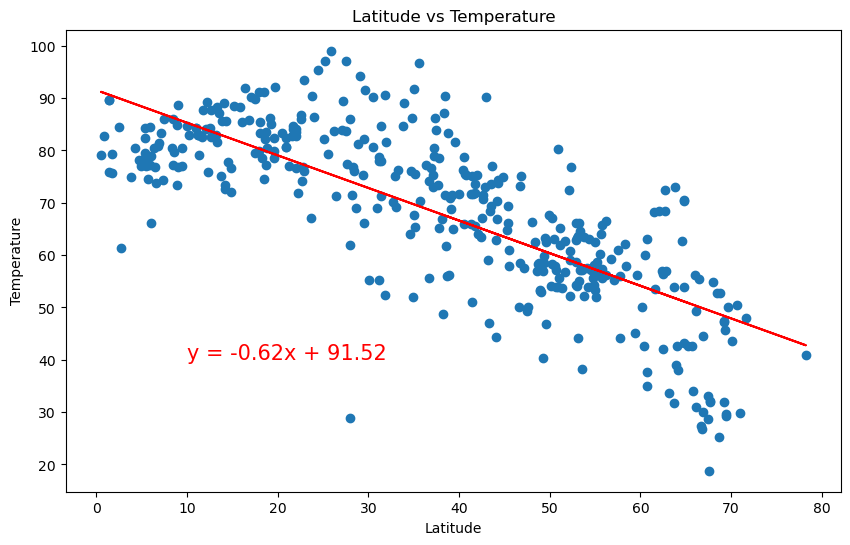

In [252]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]


linearRegressionfunc(x_values, y_values, "Latitude", "Temperature", (10,40))

The r_squared is: 0.6609981902109774


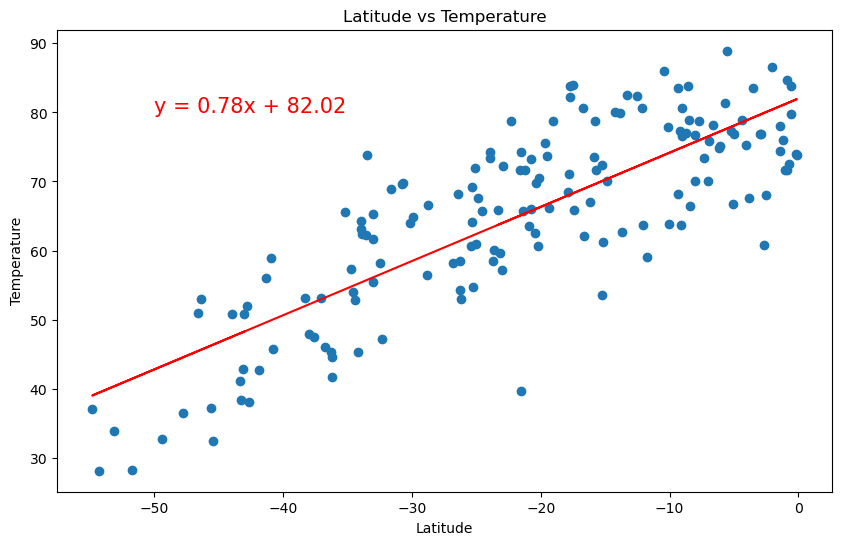

In [253]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]


linearRegressionfunc(x_values, y_values, "Latitude", "Temperature", (-50, 80))

**Discussion about the linear relationship: There is a postive correlation between Latitude and Temperature as you get closer to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r_squared is: 0.00022103620415350492


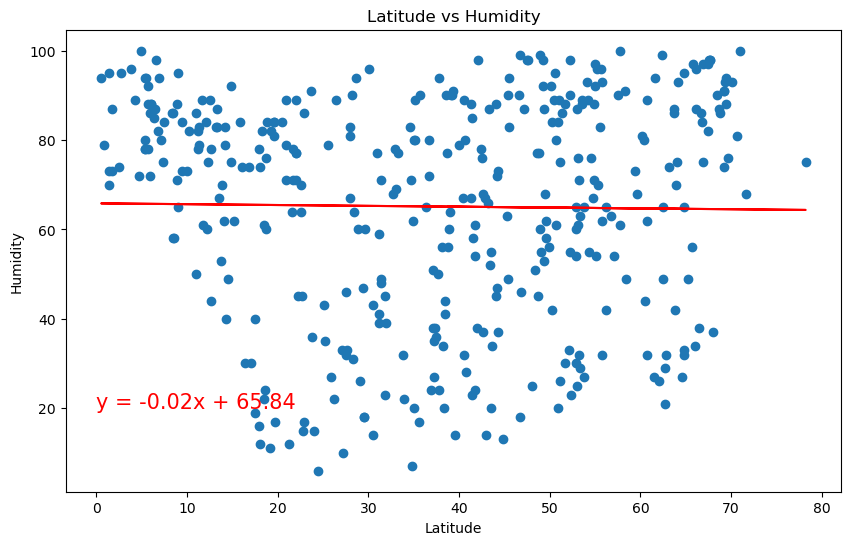

In [254]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Humidity


linearRegressionfunc(x_values, y_values, "Latitude", "Humidity", (0,20))

The r_squared is: 0.009586321206299873


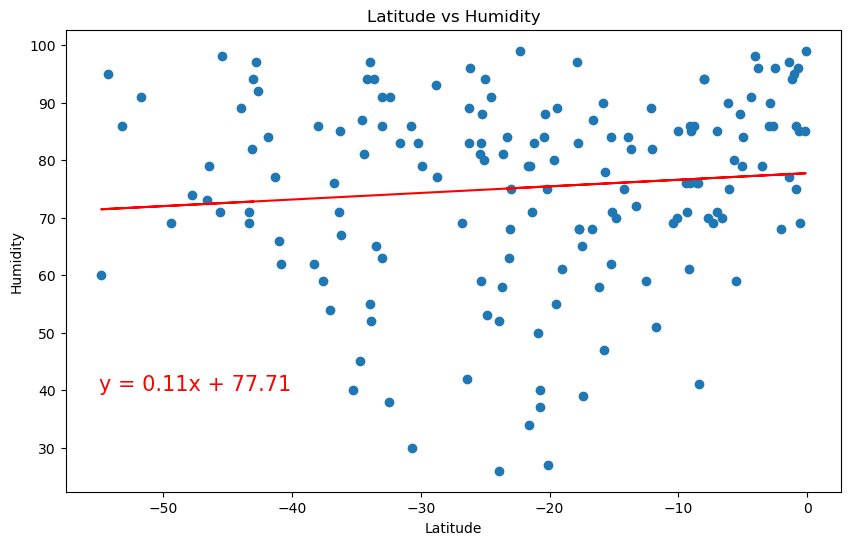

In [257]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Humidity


linearRegressionfunc(x_values, y_values, "Latitude", "Humidity", (-55, 40))

**Discussion about the linear relationship: There is no correlation between Humidity and Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r_squared is: 0.005720030583390892


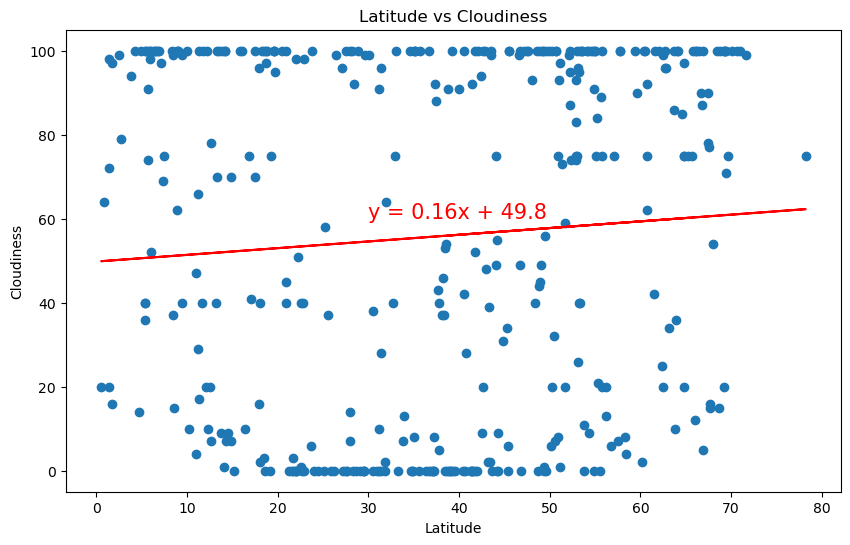

In [258]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Cloudiness


linearRegressionfunc(x_values, y_values, "Latitude", "Cloudiness", (30, 60))

The r_squared is: 0.0215057009677644


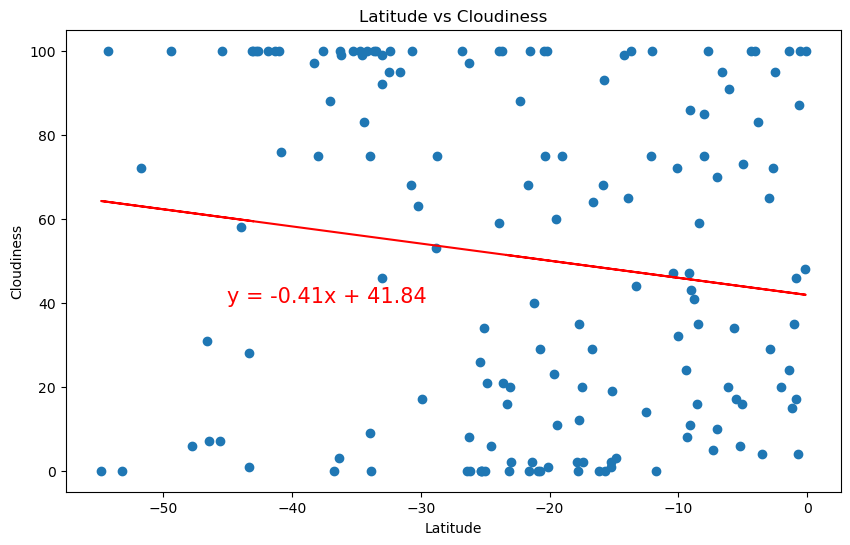

In [259]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Cloudiness


linearRegressionfunc(x_values, y_values, "Latitude", "Cloudiness", (-45, 40))

**Discussion about the linear relationship: There is no correlation between Cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r_squared is: 0.010008539653972836


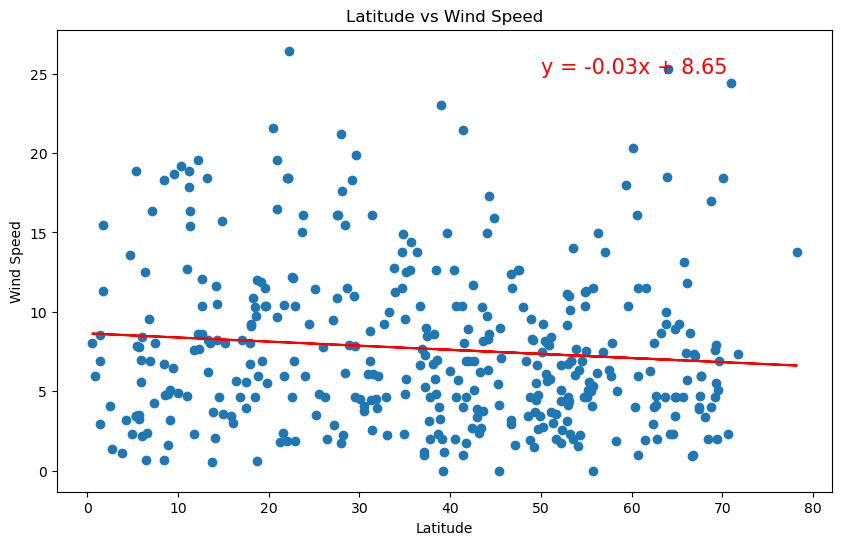

In [260]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]


linearRegressionfunc(x_values, y_values, "Latitude", "Wind Speed", (50, 25))

The r_squared is: 0.02830639509817566


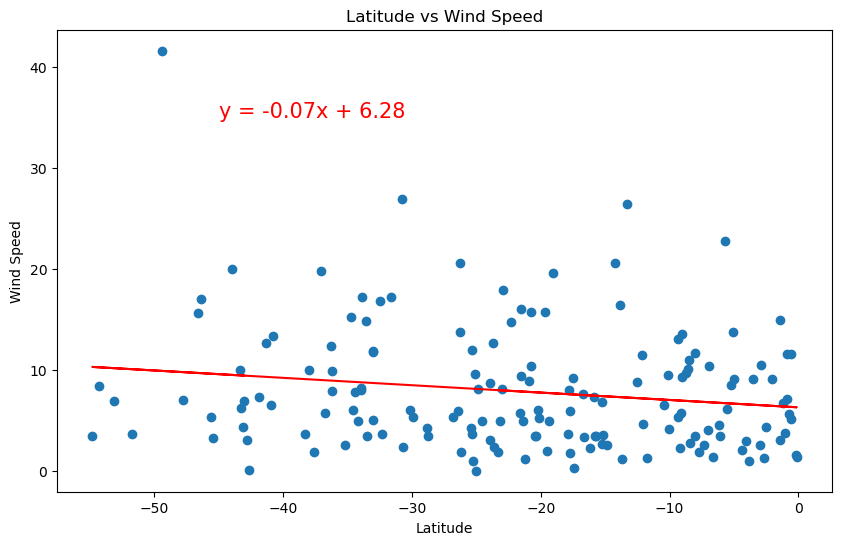

In [261]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]


linearRegressionfunc(x_values, y_values, "Latitude", "Wind Speed", (-45, 35))

**Discussion about the linear relationship: There is no correlation between Wind speed and Latitude.